# RGB3d表面图可视化

(-0.5, 255.5, 255.5, -0.5)

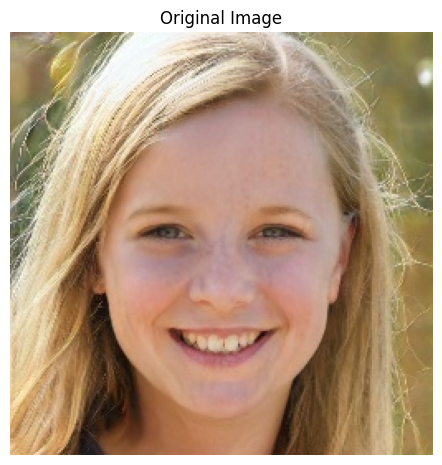

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# 加载图像并转换为灰度
path='/home/l/test_self/deepfake_detect/data/archive/real_vs_fake/real-vs-fake/test/fake/0COHPC8N1I.jpg'


# 读取RGB图像
img = Image.open(path)

# 显示原始图像
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # 关闭坐标轴显示

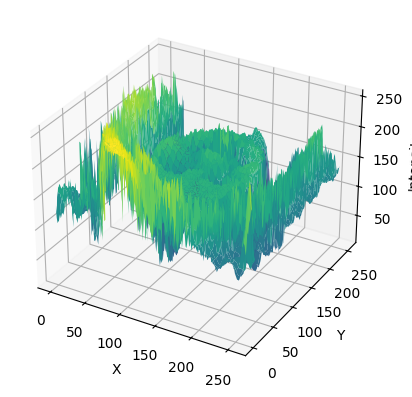

In [31]:
image = Image.open(path).convert('L')

# 获取图像数据
data = np.array(image)

# 创建网格
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
x, y = np.meshgrid(x, y)

# 创建图形和3D轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制表面图
ax.plot_surface(x, y, data, cmap='viridis')

# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')

# 显示图形
plt.show()

# RGB转为3D傅里叶频谱图

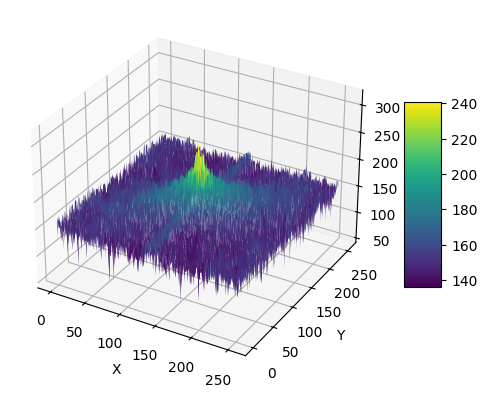

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# 读取RGB图像
img = Image.open(path).convert('RGB')

# 将图像转换为灰度图像
gray_img = img.convert('L')

# 将图像数据转换为numpy数组
data = np.array(gray_img)

# 对灰度图像进行二维傅里叶变换
f = np.fft.fft2(data)

# 将频域原点移动到中心
fshift = np.fft.fftshift(f)

# 计算幅值谱
magnitude_spectrum = 20*np.log(np.abs(fshift))

# 创建网格
x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
x, y = np.meshgrid(x, y)

# 创建图形和3D轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制表面图
surf = ax.plot_surface(x, y, magnitude_spectrum, cmap='viridis')

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Magnitude (dB)')

# 显示图形
plt.show()